Jiang, Zhiying, et al. "“Low-Resource” Text Classification: A Parameter-Free Classification Method with Compressors." Findings of the Association for Computational Linguistics: ACL 2023. 2023.

https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews

https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis?utm_medium=social&utm_campaign=kaggle-dataset-share&utm_source=twitter 

https://pytorch.org/text/stable/datasets.html

https://www.geeksforgeeks.org/sentiment-classification-using-bert/

https://github.com/Sentdex/Simple-kNN-Gzip

https://kenschutte.com/gzip-knn-paper/

https://kenschutte.com/gzip-knn-paper2/

https://chat.openai.com/c/a800eb56-29ff-424d-99f9-9ff9bca61adf

In [1]:
import zipfile
import os

# Path to your zip file
zip_path = 'datasets/movie.zip'
print(zip_path)

# Directory where you want to extract the contents, change as needed
cwd = os.getcwd()
print(cwd)

# Create the directory if it doesn't exist
os.makedirs(cwd, exist_ok=True)

# Open the zip file in read mode
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the contents into the directory specified
    zip_ref.extractall(cwd)

print(f"Files extracted to {cwd}")


datasets/movie.zip
/home/michael/gitrepos/jian23_gzip_vs_bert
Files extracted to /home/michael/gitrepos/jian23_gzip_vs_bert


In [2]:
import os
import pandas as pd

df = pd.read_csv(os.path.join(cwd, 'movie.csv'))

df.rename(columns={'text': 'review'}, inplace=True)

df

,review,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [3]:
review_counts = df['review'].value_counts()

print(f"Number of text entries: {len(review_counts)}")

def sentiment_word(row):
    return 'positive' if row['label'] == 1 else 'negative'

df['sentiment'] = df.apply(sentiment_word, axis=1)

# Count the number of occurrences of each sentiment (positive/negative)
sentiment_counts = df['sentiment'].value_counts()

print(f"Number of sentiment entries: {len(sentiment_counts)}")

df[['review','sentiment']].groupby('sentiment').count()

Number of text entries: 39723
Number of sentiment entries: 2


,review
sentiment,
negative,20019
positive,19981


In [4]:
# Create a new column in the DataFrame that contains the length of each review
df['review_length'] = df['review'].apply(len)

# Display the first few rows of the DataFrame to confirm the new column
df.head()

,review,label,sentiment,review_length
0,I grew up (b. 1965) watching and loving the Th...,0,negative,874
1,"When I put this movie in my DVD player, and sa...",0,negative,1811
2,Why do people who do not know what a particula...,0,negative,983
3,Even though I have great interest in Biblical ...,0,negative,351
4,Im a die hard Dads Army fan and nothing will e...,1,positive,983


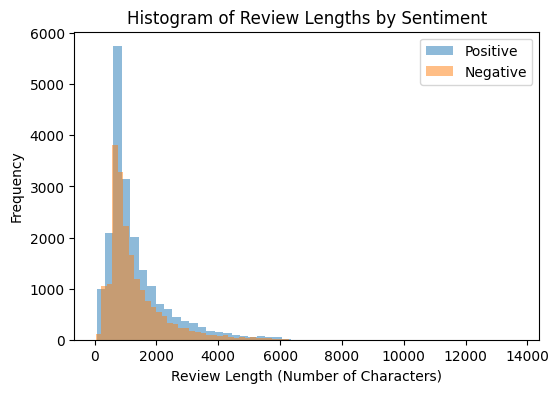

In [5]:
import matplotlib.pyplot as plt

# Create histograms for review lengths, differentiated by sentiment
plt.figure(figsize=(6, 4))

# Plot for positive reviews
plt.hist(df[df['sentiment'] == 'positive']['review_length'], bins=50, alpha=0.5, label='Positive')

# Plot for negative reviews
plt.hist(df[df['sentiment'] == 'negative']['review_length'], bins=50, alpha=0.5, label='Negative')

plt.xlabel('Review Length (Number of Characters)')
plt.ylabel('Frequency')
plt.title('Histogram of Review Lengths by Sentiment')
plt.legend()

plt.show()

Mann-Whitney U Test:
Statistic: 199069775.0, P-value: 0.4205702929316134

No significant difference in review lengths (fail to reject H0)


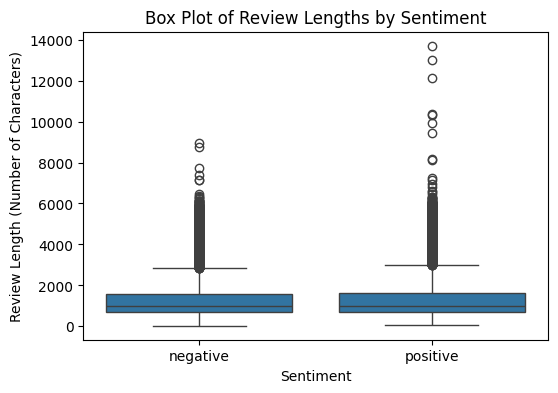

In [6]:
from scipy.stats import mannwhitneyu
import seaborn as sns

# Mann-Whitney U Test
stat, p = mannwhitneyu(df[df['sentiment'] == 'positive']['review_length'],
                       df[df['sentiment'] == 'negative']['review_length'])

print(f"Mann-Whitney U Test:\nStatistic: {stat}, P-value: {p}\n")

# Interpretation of the test result
alpha = 0.05
if p > alpha:
    print("No significant difference in review lengths (fail to reject H0)")
else:
    print("Significant difference in review lengths (reject H0)")

# Box Plot Visualization
plt.figure(figsize=(6, 4))
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title('Box Plot of Review Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length (Number of Characters)')
plt.show()


In [14]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Checking the size of each set
print(f"Training set size: {train_df.shape[0]} reviews")
print(f"Test set size: {test_df.shape[0]} reviews")

Training set size: 32000 reviews
Test set size: 8000 reviews


In [16]:
import multiprocessing
import zlib

# Check the number of available CPU cores for parallelization
cpu_cores = multiprocessing.cpu_count()
print(f"Number of CPU cores: {cpu_cores}")

# in parallel, add a column with the length of each compressed review

def compress_text(text):
    return len(zlib.compress(text.encode('utf-8')))

# Use the number of available CPU cores for parallelization
train_df['compressed_length'] = train_df['review'].apply(compress_text)
test_df['compressed_length'] = test_df['review'].apply(compress_text)

train_df.head()

Number of CPU cores: 12


,review,label,sentiment,review_length,compressed_length
14307,I watched it last night and again this morning...,1,positive,690,407
17812,"although i liked this Western,i do have to say...",1,positive,673,391
11020,I sat down to watch a documentary about Puerto...,0,negative,1774,916
15158,"This was probably intended as an ""arty"" crime ...",0,negative,334,222
24990,The summary provided by my cable TV guide made...,0,negative,1181,664


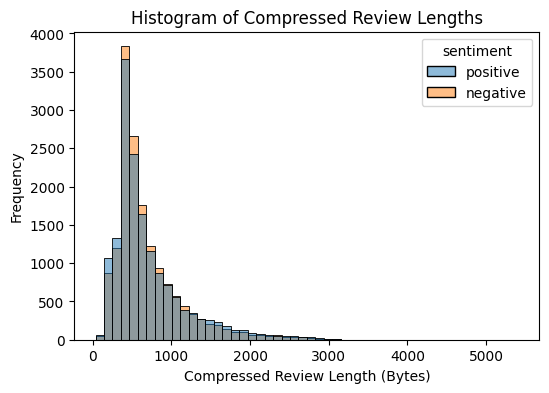

In [21]:
# using seaborn, historgram of compressed review lengths, color by sentiment
plt.figure(figsize=(6, 4))
sns.histplot(data=train_df, x='compressed_length', hue='sentiment', bins=50, kde=False)
plt.title('Histogram of Compressed Review Lengths')
plt.xlabel('Compressed Review Length (Bytes)')
plt.ylabel('Frequency')
plt.show()

In [22]:
chunk_train_df = train_df.sample(n=100, random_state=42)
chunk_test_df = test_df.sample(n=100, random_state=42)

In [25]:
from concurrent.futures import ProcessPoolExecutor
import numpy as np


# Taking a very small chunk for demonstration purposes
chunk_train_df = train_df.sample(n=100, random_state=42)

def ncd(x, y):
    """
    Computes the Normalized Compression Distance between two strings.
    """
    x_len = len(zlib.compress(x.encode()))
    y_len = len(zlib.compress(y.encode()))
    xy_len = len(zlib.compress((" ".join([x, y])).encode()))
    return (xy_len - min(x_len, y_len)) / max(x_len, y_len)

def add_ncd_feature(train_df, test_df):
    """
    Adds a new feature column called 'ncd' to the test_df DataFrame.
    The 'ncd' column contains the NCD values for each review pair.
    """
    ncd_matrix = np.zeros((test_df.shape[0], train_df.shape[0]))
    for i, testRow in test_df.reset_index().iterrows():
        x_len = testRow['compressed_length']
        for j, trainRow in train_df.reset_index().iterrows():
            y_len = trainRow['compressed_length']
            # Concatenate the two reviews and compute the NCD
            xy_len = len(zlib.compress((" ".join([testRow['review'], trainRow['review']])).encode()))
            ncd_matrix[i, j] = (xy_len - min(x_len, y_len)) / max(x_len, y_len)

    test_df['ncd'] = ncd_matrix.tolist()
    return test_df
            

chunk_train_df = add_ncd_feature(chunk_train_df, chunk_train_df)

chunk_train_df

,review,label,sentiment,review_length,compressed_length,ncd
22076,"Like most musicals of the era, one must check ...",0,negative,1111,612,"[0.032679738562091505, 0.9050535987748851, 0.9..."
33570,This movie is about the crew of a spaceship wh...,1,positive,1206,653,"[0.900459418070444, 0.03215926493108729, 0.932..."
28139,So when i was little i got this movie as a pre...,1,positive,723,387,"[0.9166666666666666, 0.9310872894333844, 0.033..."
31046,"After being bitten by a bat in a cave,a doctor...",0,negative,731,437,"[0.9166666666666666, 0.9234303215926493, 0.917..."
26686,I wouldn't call myself a big fan of the genre ...,0,negative,703,418,"[0.9101307189542484, 0.9111791730474732, 0.885..."
...,...,...,...,...,...,...
25256,"""Electra Glide in Blue"" is a slow moving B-fli...",0,negative,362,240,"[0.9444444444444444, 0.9234303215926493, 0.894..."
18000,"Thirty years after its initial release, the th...",1,positive,5376,2629,"[0.9554963864587296, 0.9589197413465196, 0.968..."
11175,"This is one of the bleakest, the most harrowin...",1,positive,743,433,"[0.8921568627450981, 0.8989280245022971, 0.893..."
15091,The only good thing about this movie was the s...,0,negative,650,394,"[0.9003267973856209, 0.9249617151607963, 0.840..."


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

chunk_test_df = add_ncd_feature(chunk_train_df, chunk_test_df)

# Convert the 'ncd' column lists into a format suitable for scikit-learn
X_train = np.array(chunk_train_df['ncd'].tolist())
y_train = chunk_train_df['sentiment'].values

X_test = np.array(chunk_test_df['ncd'].tolist())
y_test = chunk_test_df['sentiment'].values

# Initialize the kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the kNN classifier
knn.fit(X_train, y_train)

# Predict sentiments for the testing set
predicted_sentiments = knn.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, predicted_sentiments, target_names=['Negative', 'Positive']))


              precision    recall  f1-score   support

    Negative       0.50      0.57      0.53        42
    Positive       0.65      0.59      0.62        58

    accuracy                           0.58       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.59      0.58      0.58       100

